In [6]:
import time
start_time = time.time()
import pandas as pd
pd.set_option('display.max_rows', 200)
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number form
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

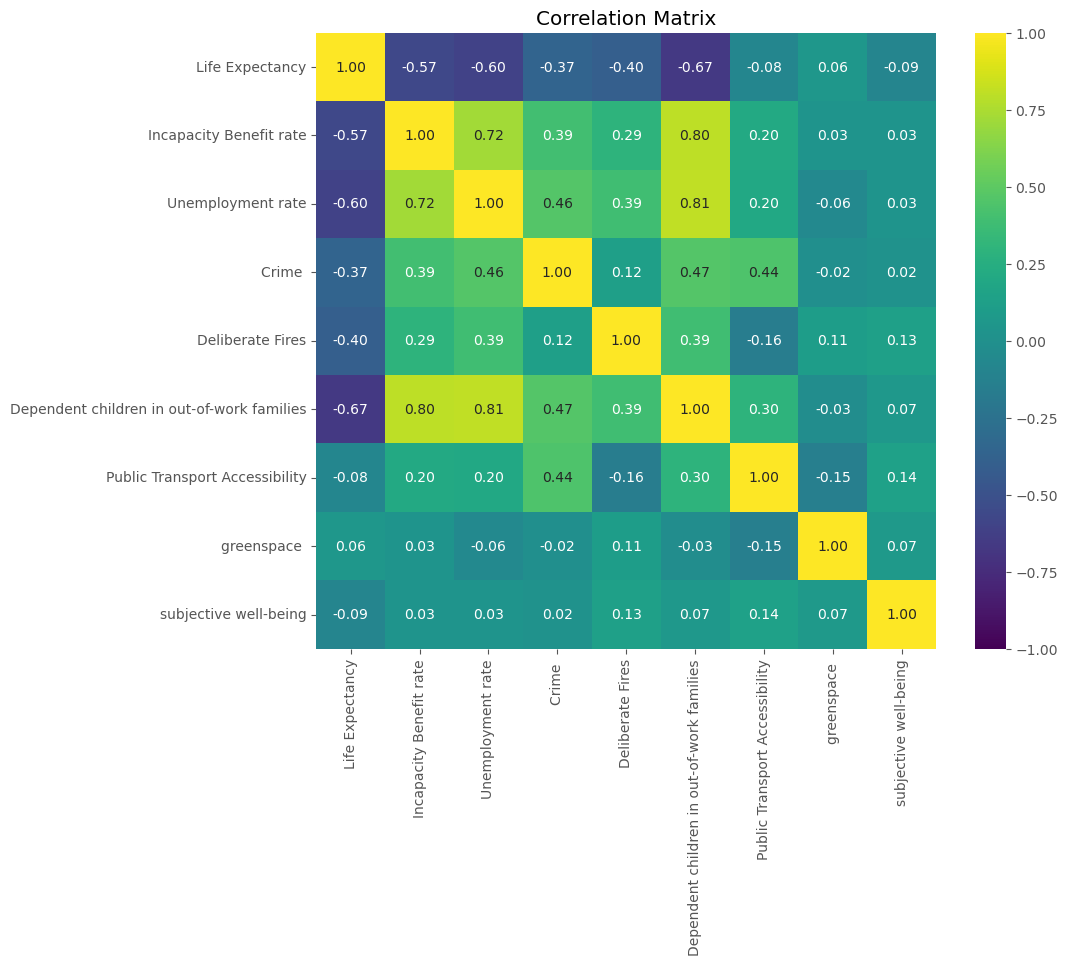

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('London data.csv')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [8]:
pip install pandas geopandas matplotlib seaborn contextily

Note: you may need to restart the kernel to use updated packages.


In [9]:
data = pd.read_csv('London data.csv')
data.head()

,Old Ward Code,New ward code,Ward,Borough,Life Expectancy,Incapacity Benefit rate,Unemployment rate,Crime,Deliberate Fires,Dependent children in out-of-work families,Public Transport Accessibility,greenspace,subjective well-being
0,00AA,E09000001,City of London,City of London,86.4000,0.8000,2.2000,14.0000,0.3000,10,7.9000,-6.5000,7.7000
1,00ABFX,E05000026,Abbey,Barking and Dagenham,82.0000,1.6000,8.9000,120.8000,1.2000,25,6.0000,-0.9000,7.8000
2,00ABFY,E05000027,Alibon,Barking and Dagenham,79.0000,3.2000,10.2000,93.2000,0.7000,32,3.1000,-1.8000,7.6000
3,00ABFZ,E05000028,Becontree,Barking and Dagenham,79.2000,2.3000,9.9000,104.7000,0.4000,32,2.9000,-5.5000,7.6000
4,00ABGA,E05000029,Chadwell Heath,Barking and Dagenham,80.8000,2.6000,8.6000,83.7000,1.9000,28,2.3000,2.0000,7.6000


In [10]:
data.describe(include=[np.number])

,Life Expectancy,Incapacity Benefit rate,Unemployment rate,Crime,Deliberate Fires,Dependent children in out-of-work families,Public Transport Accessibility,greenspace,subjective well-being
count,658.0000,658.0000,658.0000,658.0000,658.0000,658.0000,658.0000,658.0000,658.0000
mean,81.9930,1.7309,5.9696,82.3467,0.4802,18.5699,3.7723,-0.2102,7.6679
std,2.2239,0.6662,3.3118,29.3941,0.4283,8.6792,1.3856,6.6760,0.2099
min,76.0000,0.1000,0.4000,13.9000,0.0000,1.0000,1.3000,-22.3000,7.2000
25%,80.4000,1.2250,3.3000,62.3000,0.2000,11.0000,2.7000,-4.8000,7.5000
50%,81.9000,1.7000,5.3000,78.4500,0.4000,19.0000,3.4000,-0.1000,7.7000
75%,83.4000,2.1000,8.1000,97.5250,0.6000,25.0000,4.6000,4.4000,7.8000
max,90.3000,4.8000,23.5000,222.9000,2.6000,44.0000,8.0000,18.3000,8.4000


In [11]:
 print(f"The row is {df.shape[0]:,}")

The row is 658


In [12]:
data = data.rename(columns={
    'Life Expectancy': 'life',
    'Incapacity Benefit rate': 'subsidies',
    'Unemployment rate': 'Unemployment',
    'Crime rate': 'Crime',
    'Deliberate Fires': 'Fires',
    'Public Transport Accessibility': 'Transport',
    'Dependent children in out-of-work families': 'families',
    'subjective well-being': 'score'
})

In [13]:
data.head()

,Old Ward Code,New ward code,Ward,Borough,life,subsidies,Unemployment,Crime,Fires,families,Transport,greenspace,score
0,00AA,E09000001,City of London,City of London,86.4000,0.8000,2.2000,14.0000,0.3000,10,7.9000,-6.5000,7.7000
1,00ABFX,E05000026,Abbey,Barking and Dagenham,82.0000,1.6000,8.9000,120.8000,1.2000,25,6.0000,-0.9000,7.8000
2,00ABFY,E05000027,Alibon,Barking and Dagenham,79.0000,3.2000,10.2000,93.2000,0.7000,32,3.1000,-1.8000,7.6000
3,00ABFZ,E05000028,Becontree,Barking and Dagenham,79.2000,2.3000,9.9000,104.7000,0.4000,32,2.9000,-5.5000,7.6000
4,00ABGA,E05000029,Chadwell Heath,Barking and Dagenham,80.8000,2.6000,8.6000,83.7000,1.9000,28,2.3000,2.0000,7.6000


In [14]:
data_new=data.drop(['Old Ward Code','New ward code','Ward','Borough'], axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   life          658 non-null    float64
 1   subsidies     658 non-null    float64
 2   Unemployment  658 non-null    float64
 3   Crime         658 non-null    float64
 4   Fires         658 non-null    float64
 5   families      658 non-null    int64  
 6   Transport     658 non-null    float64
 7   greenspace    658 non-null    float64
 8   score         658 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 46.4 KB


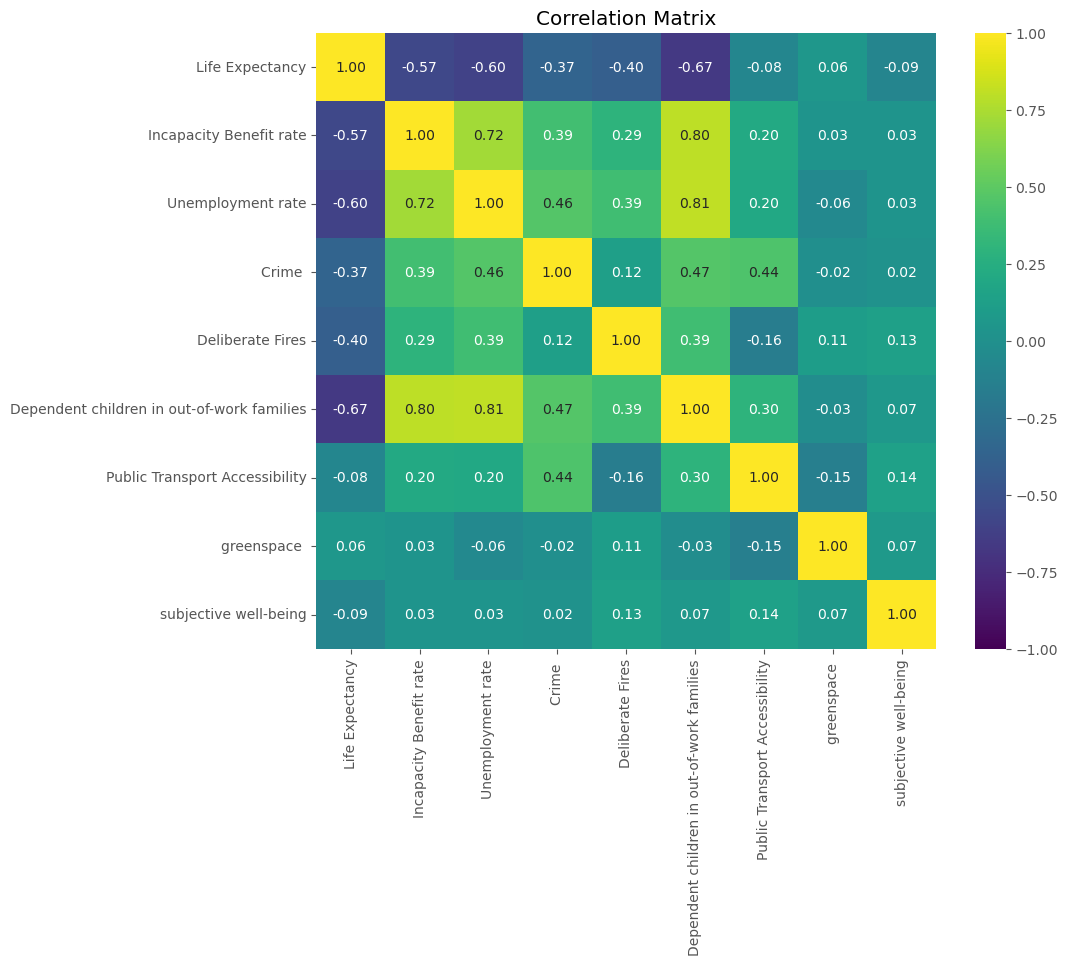

In [15]:

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [16]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF for each feature in a pandas dataframe.
    A constant must be added to variance_inflation_factor or the results will be incorrect.
    
    :param df: the pandas dataframe containing only the predictor features, not the target variable.
    :param thresh: the max VIF value before the feature is removed from the dataframe.
    :return: dataframe with features removed based on VIF threshold.
    '''
    # Add a constant to the dataframe
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    
    # Calculate VIF for each variable
    vif_df = pd.Series([variance_inflation_factor(const.values, i) for i in range(const.shape[1])], index=const.columns).to_frame()
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    
    # Remove the constant column from the VIF dataframe
    vif_df = vif_df.drop('const')
    
    # Identify features with VIF above the threshold
    vif_df = vif_df[vif_df['VIF'] > thresh]
    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])
    
    # Drop features with high VIF
    col_to_drop = list(vif_df.index)
    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)
    
    return df

# 示例使用
# 假设 `predictors_data` 是包含自变量的 DataFrame
# processed_data = calculate_vif_(predictors_data)

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
predictors_data = data_new.drop(columns=['score'], axis=1)
response_data = data[['score']]

In [19]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF for each feature in a pandas dataframe.
    A constant must be added to variance_inflation_factor or the results will be incorrect.
    
    :param df: the pandas dataframe containing only the predictor features, not the target variable.
    :param thresh: the max VIF value before the feature is removed from the dataframe.
    :return: dataframe with features removed based on VIF threshold.
    '''
    # Add a constant to the dataframe
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    
    # Calculate VIF for each variable
    vif_df = pd.Series([variance_inflation_factor(const.values, i) for i in range(const.shape[1])], index=const.columns).to_frame()
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    
    # Remove the constant column from the VIF dataframe
    vif_df = vif_df.drop('const')
    
    # Identify features with VIF above the threshold
    vif_df = vif_df[vif_df['VIF'] > thresh]
    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])
    
    # Drop features with high VIF
    col_to_drop = list(vif_df.index)
    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)
    
    return df

# 示例使用
# 假设 `predictors_data` 是包含自变量的 DataFrame
# processed_data = calculate_vif_(predictors_data)


In [20]:
df_predictors_select_VIF = calculate_vif_(predictors_data)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Features above VIF threshold:

                                              VIF
families                                   5.0579
Dropping: families
The columns remaining after VIF selection are:
Index(['life', 'subsidies', 'Unemployment', 'Crime ', 'Fires', 'Transport',
       'greenspace '],
      dtype='object')


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

In [22]:
import pandas as pd
import statsmodels.api as sm

# 假设df_predictors_select_VIF是已经通过VIF方法筛选过的自变量DataFrame
# response_data是因变量Series

# 添加常数项，用于模型中的截距
X = sm.add_constant(df_predictors_select_VIF)
y = response_data

# 使用OLS模型拟合数据
model = sm.OLS(y, X).fit()

# 打印模型的摘要，其中包括系数、截距、p值、R平方等信息
print(model.summary())

# 如果只想要查看系数和截距，可以单独提取并显示
intercept = model.params['const']
coefficients = model.params.drop('const')
print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.241
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           4.27e-07
Time:                        18:14:08   Log-Likelihood:                 115.60
No. Observations:                 658   AIC:                            -215.2
Df Residuals:                     650   BIC:                            -179.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.4066      0.413     20.347   

In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'geometry'], dtype='object')
Index(['Old Ward Code', 'New ward code', 'Ward', 'Borough', 'Life Expectancy',
       'Incapacity Benefit rate', 'Unemployment rate', 'Crime ',
       'Deliberate Fires', 'Dependent children in out-of-work families',
       'Public Transport Accessibility', 'greenspace ',
       'subjective well-being'],
      dtype='object')


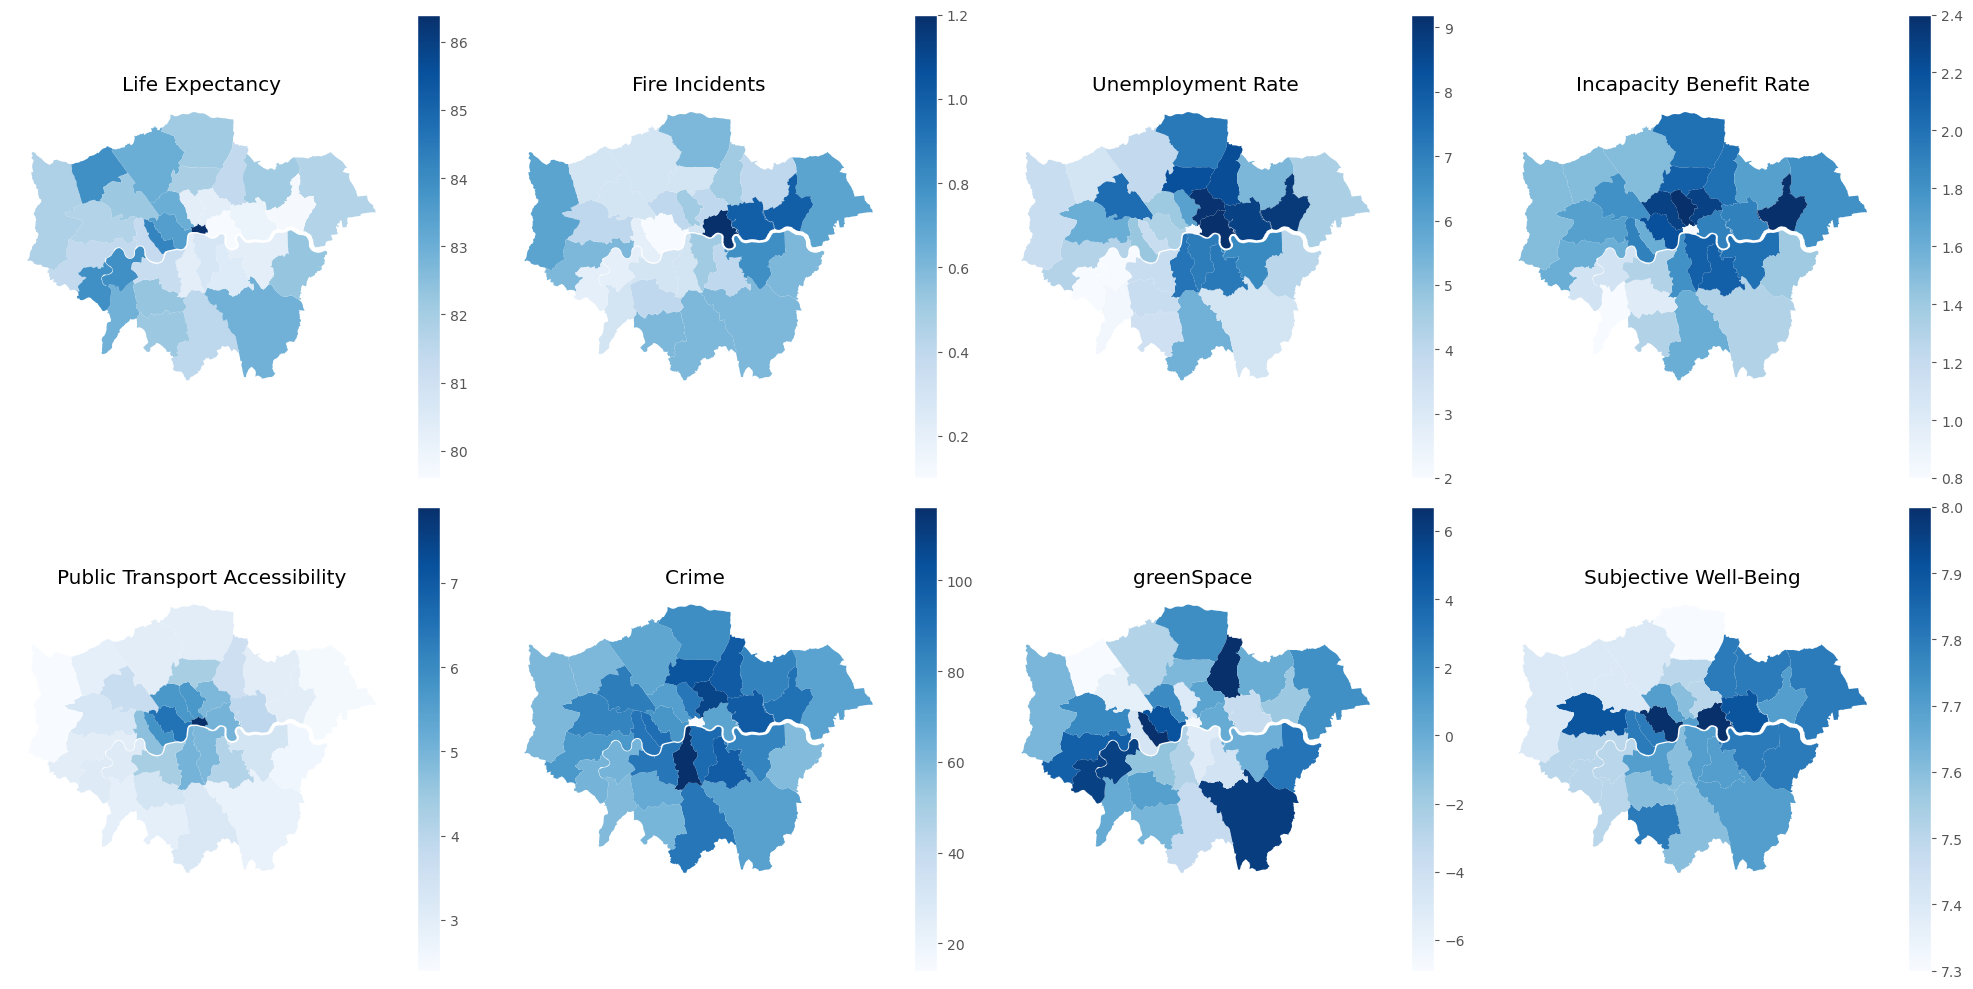

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file with borough boundaries
geo_data = gpd.read_file('boroughs_wgs84.geojson')

# Load the socio-economic data from CSV
se_data = pd.read_csv('London data.csv')

# Check common column to merge on - let's assume "GSS_CODE" in geo_data and "New ward code" in se_data
print(geo_data.columns)
print(se_data.columns)

# Merge the dataframes on the common column (e.g., 'GSS_CODE' and 'New ward code')
merged_data = geo_data.merge(se_data, left_on='GSS_CODE', right_on='New ward code')

# Set up the plot grid - since there are 7 variables, use a 2x4 grid to accommodate all
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

variables_to_plot = [
    'Life Expectancy', 
    'Deliberate Fires', 
    'Unemployment rate', 
    'Incapacity Benefit rate', 
    'Public Transport Accessibility',
    'Crime ',
    'greenspace ',
    'subjective well-being'
]

titles_to_plot = [
    'Life Expectancy', 
    'Fire Incidents', 
    'Unemployment Rate', 
    'Incapacity Benefit Rate', 
    'Public Transport Accessibility',
    'Crime ',
    'greenSpace ',
    'Subjective Well-Being'
]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each socio-economic variable on the grid
for ax, var, title in zip(axes[:8], variables_to_plot, titles_to_plot):
    merged_data.plot(column=var, ax=ax, legend=True, cmap='Blues')
    ax.set_title(title)
    ax.axis('off')

# Remove any unused subplot (if the number of variables is less than the number of subplots)
for ax in axes[len(variables_to_plot):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

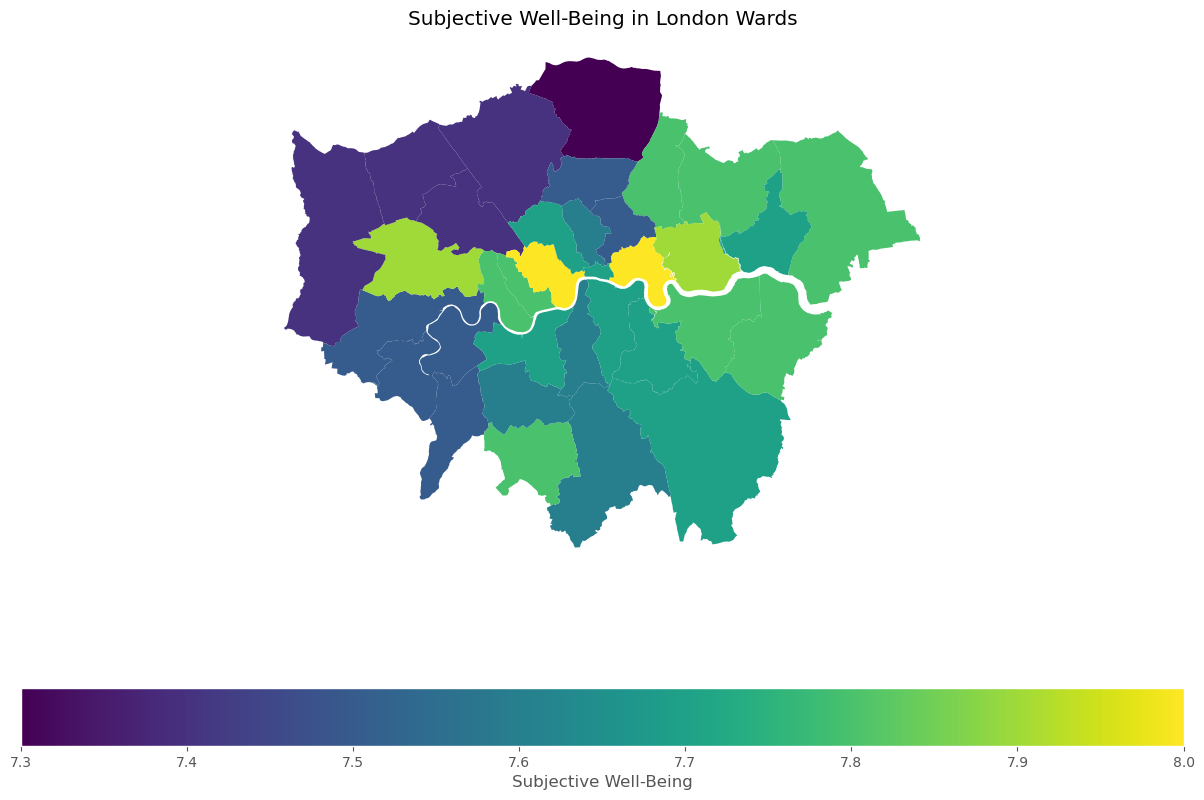

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加载GeoJSON文件
geojson_path = 'boroughs_wgs84.geojson'
gdf = gpd.read_file(geojson_path)

# 加载CSV文件
csv_path = 'London data.csv'
df = pd.read_csv(csv_path)

# 检查CSV文件内容
df.head()

# 合并数据，根据GSS_CODE和New ward code进行匹配
merged_df = gdf.merge(df, left_on='GSS_CODE', right_on='New ward code')

# 检查合并后的数据
merged_df.head()

# 绘制热力地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='subjective well-being', ax=ax, legend=True,
               legend_kwds={'label': "Subjective Well-Being",
                            'orientation': "horizontal"})
ax.set_title('Subjective Well-Being in London Wards')
ax.set_axis_off()

# 显示图像
plt.show()
